<a href="https://colab.research.google.com/github/tcheskko/TimeSeries_OceanAtmo/blob/main/DataSetOceanAtmo_2018_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving inmet.csv to inmet.csv
Saving pirata.csv to pirata.csv


In [3]:
dsPirata = pd.read_csv("pirata.csv")
dsInmet = pd.read_csv("inmet.csv")

# Preparação para concatenação dos dados PIRATA + INMET

In [4]:
print(dsPirata.columns)
print(dsInmet.columns)

Index(['DATE', 'PIR_SSS', 'PIR_DYN', 'PIR_PREC', 'PIR_SST', 'PIR_WSPD',
       'PIR_WDIR', 'PIR_WDIRCR'],
      dtype='object')
Index(['Unnamed: 0', 'DATE', 'INM_PREC_TOTAL', 'INM_TEMP_BSE', 'INM_UMID_AR',
       'INM_VENT_DIR', 'INM_VENT_VEL', 'INM_VENT_DROS'],
      dtype='object')


In [5]:
del dsInmet["Unnamed: 0"]

In [6]:
dsPirata.set_index('DATE', inplace=True)
dsInmet.set_index('DATE', inplace=True)


In [7]:
print(dsPirata.isnull().sum())
print(dsInmet.isnull().sum())

PIR_SSS       0
PIR_DYN       0
PIR_PREC      0
PIR_SST       0
PIR_WSPD      0
PIR_WDIR      0
PIR_WDIRCR    0
dtype: int64
INM_PREC_TOTAL    0
INM_TEMP_BSE      0
INM_UMID_AR       0
INM_VENT_DIR      0
INM_VENT_VEL      0
INM_VENT_DROS     0
dtype: int64


In [8]:
dfOceanoAtmosfera = pd.concat([dsPirata,dsInmet], axis=1)

In [9]:
print(dfOceanoAtmosfera.isnull().sum())

PIR_SSS           0
PIR_DYN           0
PIR_PREC          0
PIR_SST           0
PIR_WSPD          0
PIR_WDIR          0
PIR_WDIRCR        0
INM_PREC_TOTAL    0
INM_TEMP_BSE      0
INM_UMID_AR       0
INM_VENT_DIR      0
INM_VENT_VEL      0
INM_VENT_DROS     0
dtype: int64


In [10]:
dfOceanoAtmosfera.dtypes

PIR_SSS           float64
PIR_DYN           float64
PIR_PREC          float64
PIR_SST           float64
PIR_WSPD          float64
PIR_WDIR          float64
PIR_WDIRCR         object
INM_PREC_TOTAL    float64
INM_TEMP_BSE      float64
INM_UMID_AR       float64
INM_VENT_DIR      float64
INM_VENT_VEL      float64
INM_VENT_DROS      object
dtype: object

In [11]:
print("\n", dfOceanoAtmosfera.describe(), sep='\n')



           PIR_SSS      PIR_DYN     PIR_PREC      PIR_SST     PIR_WSPD  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean     37.104714   101.193409     0.075241    26.733721     4.856969   
std       0.375120     3.090643     0.432240     1.476417     1.681027   
min      36.342000    93.750000    -0.060000    23.980000     0.600000   
25%      36.770250    98.820000    -0.010000    25.552500     3.600000   
50%      37.251000   101.155000     0.000000    26.810000     4.800000   
75%      37.403000   102.877500     0.000000    27.807500     6.000000   
max      37.710000   111.120000     9.460000    30.180000     9.700000   

          PIR_WDIR  INM_PREC_TOTAL  INM_TEMP_BSE  INM_UMID_AR  INM_VENT_DIR  \
count  1826.000000     1826.000000   1826.000000  1826.000000   1826.000000   
mean    259.443661        0.138007     21.555312    73.459748    198.634721   
std      59.034056        0.945676      4.090770    11.188725    110.279900   
min       0.200

In [12]:
dfOceanoAtmosfera.index

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       ...
       '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
       '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
      dtype='object', name='DATE', length=1826)

In [13]:
compassRose_PIR = pd.Categorical(dfOceanoAtmosfera["PIR_WDIRCR"])
compassRose_PIR = compassRose_PIR.rename_categories(["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])
dfOceanoAtmosfera["PIR_WDIRCR"] = compassRose_PIR

compassRose_INM = pd.Categorical(dfOceanoAtmosfera["INM_VENT_DROS"])
compassRose_INM = compassRose_INM.rename_categories(["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])
dfOceanoAtmosfera["INM_VENT_DROS"] = compassRose_INM

# Plot de série temporal: PIRATA

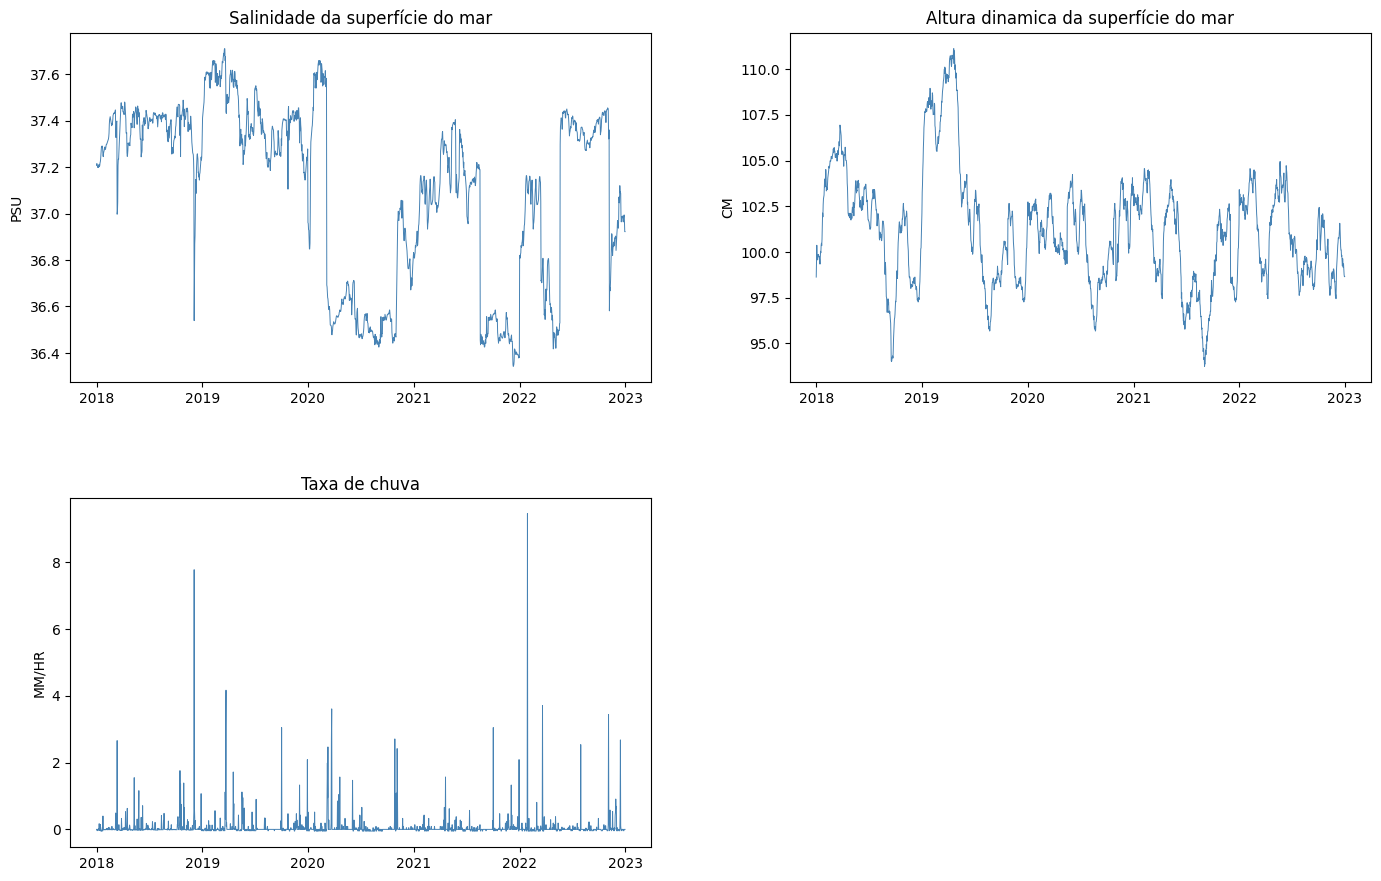

In [14]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(2, 2)

x = pd.to_datetime(dfOceanoAtmosfera.index)
y1 = dfOceanoAtmosfera["PIR_SSS"]
y2 = dfOceanoAtmosfera["PIR_DYN"]
y3 = dfOceanoAtmosfera["PIR_PREC"]


ax[0, 0].plot(x, y1, color="steelblue", linewidth=0.7)
ax[0, 0].set_title("Salinidade da superfície do mar")
ax[0, 0].set_ylabel("PSU")

ax[0, 1].plot(x, y2, color="steelblue", linewidth=0.7)
ax[0, 1].set_title("Altura dinamica da superfície do mar")
ax[0, 1].set_ylabel("CM")

ax[1, 0].plot(x, y3, color="steelblue", linewidth=0.7)
ax[1, 0].set_title("Taxa de chuva")
ax[1, 0].set_ylabel("MM/HR")


f = plt.gcf()
f.set_figwidth(15)
f.set_figheight(10)
f.delaxes(ax[1,1])

fig.tight_layout(pad=5.0)

plt.show()

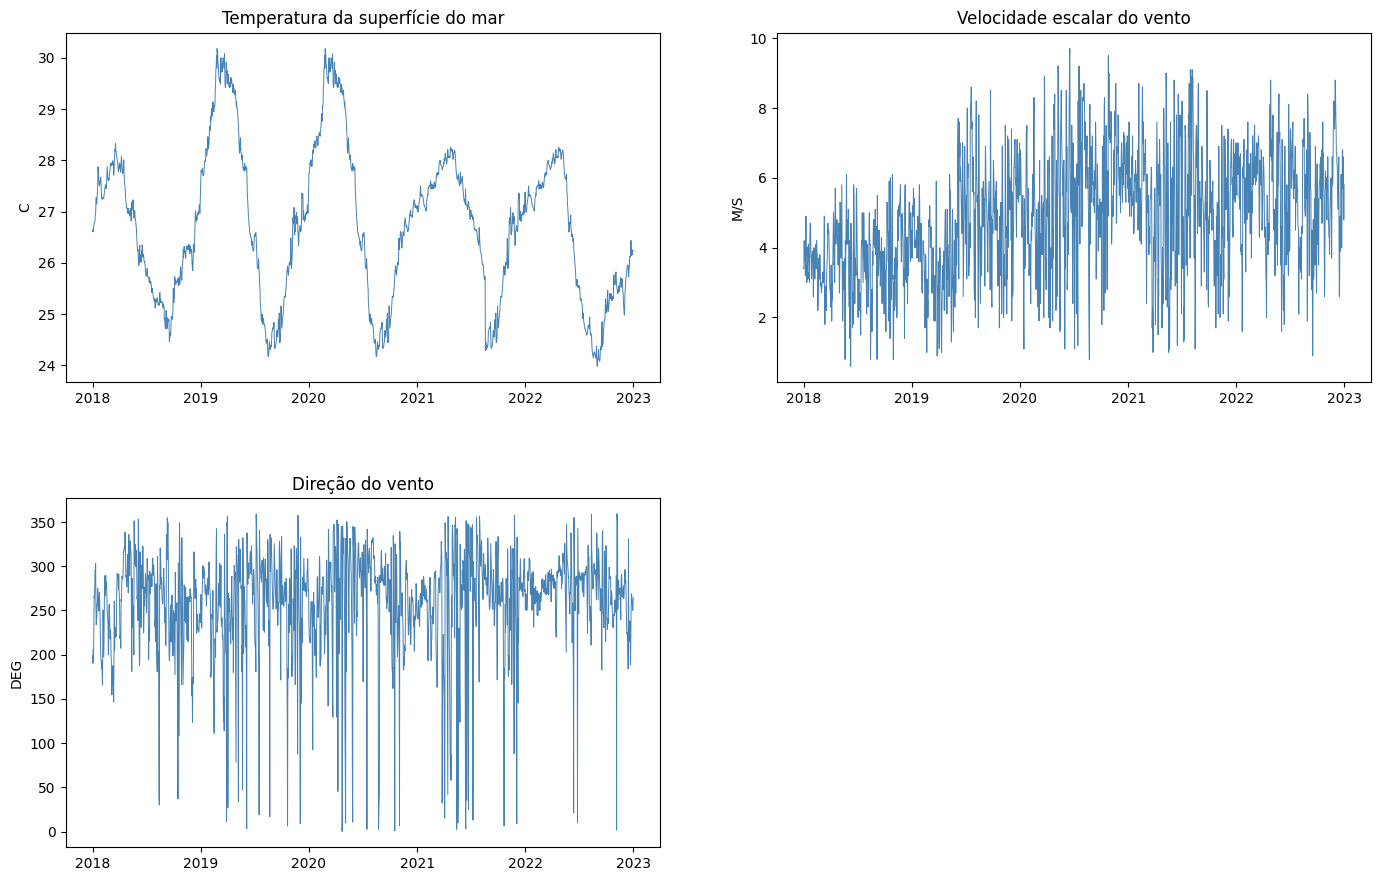

In [15]:
fig, ax = plt.subplots(2, 2)

x = pd.to_datetime(dfOceanoAtmosfera.index)
y1 = dfOceanoAtmosfera["PIR_SST"]
y2 = dfOceanoAtmosfera["PIR_WSPD"]
y3 = dfOceanoAtmosfera["PIR_WDIR"]


ax[0, 0].plot(x, y1, color="steelblue", linewidth=0.7)
ax[0, 0].set_title("Temperatura da superfície do mar")
ax[0, 0].set_ylabel("C")

ax[0, 1].plot(x, y2, color="steelblue", linewidth=0.7)
ax[0, 1].set_title("Velocidade escalar do vento")
ax[0, 1].set_ylabel("M/S")

ax[1, 0].plot(x, y3, color="steelblue", linewidth=0.7)
ax[1, 0].set_title("Direção do vento")
ax[1, 0].set_ylabel("DEG")

f = plt.gcf()
f.set_figwidth(15)
f.set_figheight(10)
f.delaxes(ax[1,1])

fig.tight_layout(pad=5.0)

plt.show()

#Plot de série temporal: INMET

In [16]:
dfOceanoAtmosfera.columns

Index(['PIR_SSS', 'PIR_DYN', 'PIR_PREC', 'PIR_SST', 'PIR_WSPD', 'PIR_WDIR',
       'PIR_WDIRCR', 'INM_PREC_TOTAL', 'INM_TEMP_BSE', 'INM_UMID_AR',
       'INM_VENT_DIR', 'INM_VENT_VEL', 'INM_VENT_DROS'],
      dtype='object')

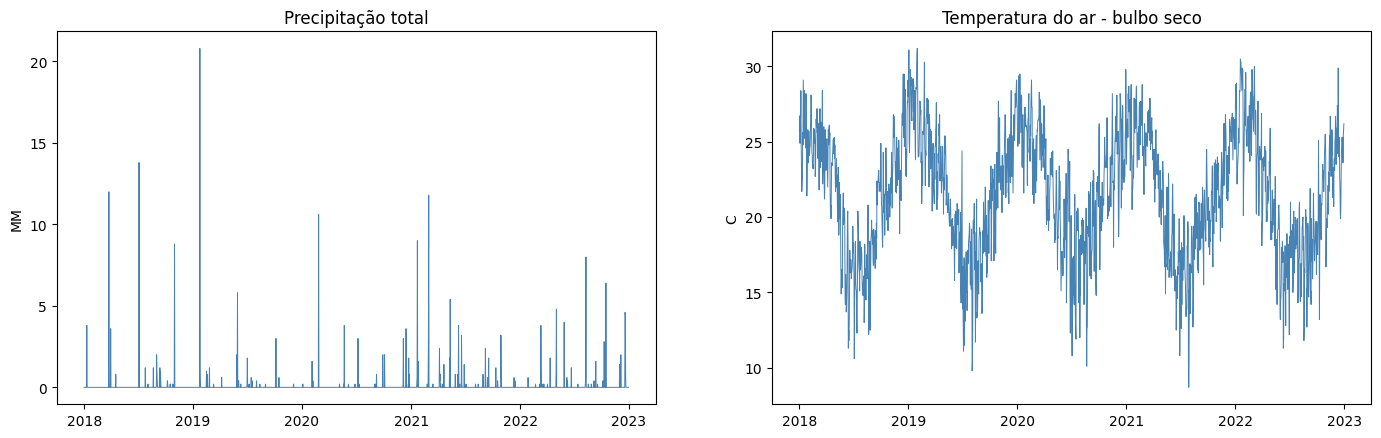

In [17]:

fig, ax = plt.subplots(2, 2)

x = pd.to_datetime(dfOceanoAtmosfera.index)
y1 = dfOceanoAtmosfera["INM_PREC_TOTAL"]
y3 = dfOceanoAtmosfera["INM_TEMP_BSE"]

ax[0, 0].plot(x, y1, color="steelblue", linewidth=0.7)
ax[0, 0].set_title("Precipitação total")
ax[0, 0].set_ylabel("MM")

ax[0, 1].plot(x, y3, color="steelblue", linewidth=0.7)
ax[0, 1].set_title("Temperatura do ar - bulbo seco")
ax[0, 1].set_ylabel("C")

f = plt.gcf()
f.set_figwidth(15)
f.set_figheight(10)
f.delaxes(ax[1,0])
f.delaxes(ax[1,1])

fig.tight_layout(pad=5.0)

plt.show()


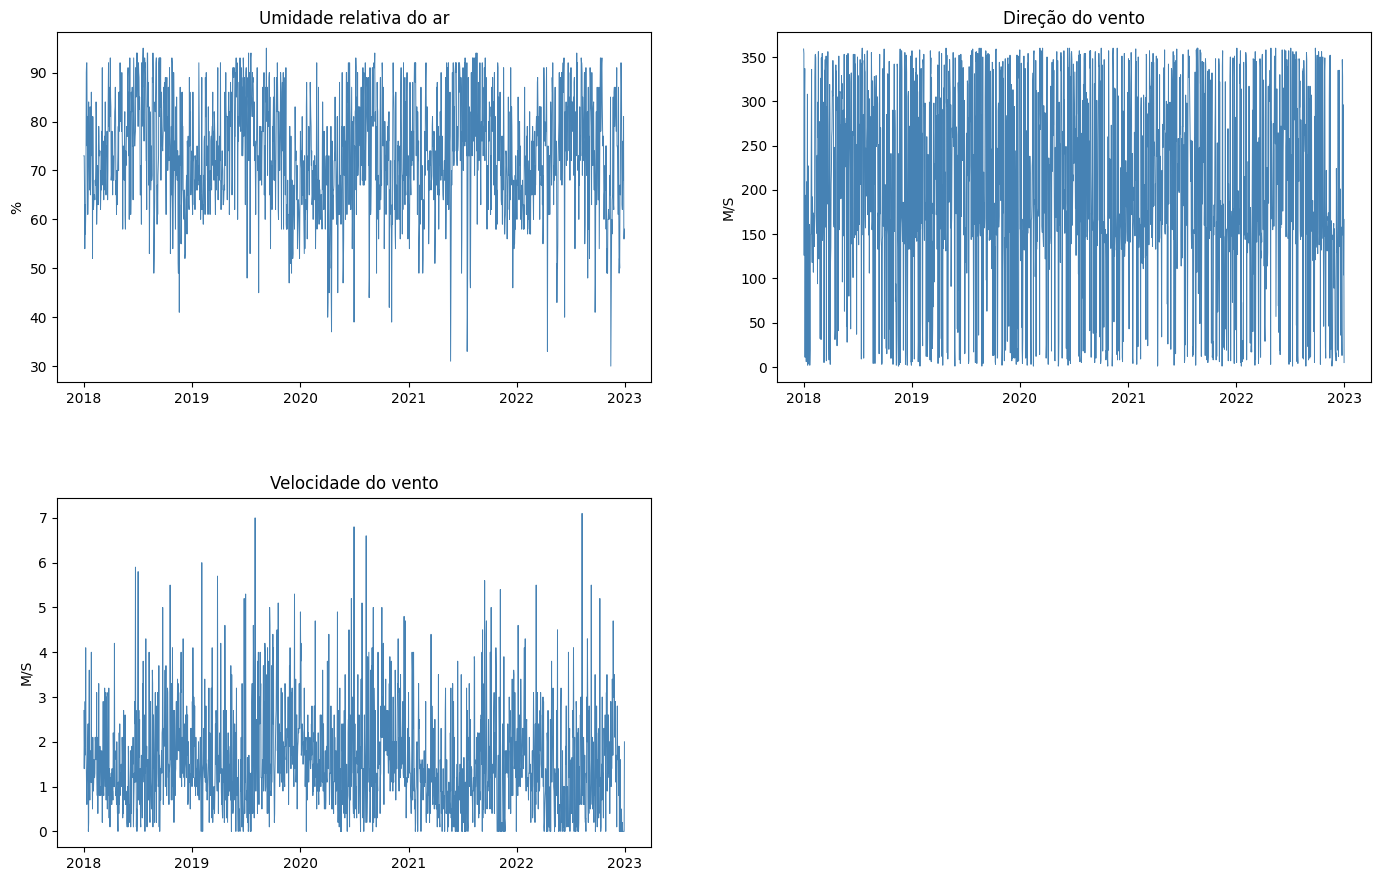

In [18]:
fig, ax = plt.subplots(2, 2)

x = pd.to_datetime(dfOceanoAtmosfera.index)
y1 = dfOceanoAtmosfera["INM_UMID_AR"]
y2 = dfOceanoAtmosfera["INM_VENT_DIR"]
y4 = dfOceanoAtmosfera["INM_VENT_VEL"]

ax[0, 0].plot(x, y1, color="steelblue", linewidth=0.7)
ax[0, 0].set_title("Umidade relativa do ar")
ax[0, 0].set_ylabel("%")

ax[0, 1].plot(x, y2, color="steelblue", linewidth=0.7)
ax[0, 1].set_title("Direção do vento")
ax[0, 1].set_ylabel("M/S")

ax[1, 0].plot(x, y4, color="steelblue", linewidth=0.7)
ax[1, 0].set_title("Velocidade do vento")
ax[1, 0].set_ylabel("M/S")

f = plt.gcf()
f.set_figwidth(15)
f.set_figheight(10)
f.delaxes(ax[1,1])

fig.tight_layout(pad=5.0)

plt.show()

#BoxPlot de série temporal: PIRATA

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
dfOceanoAtmosfera.columns

Index(['PIR_SSS', 'PIR_DYN', 'PIR_PREC', 'PIR_SST', 'PIR_WSPD', 'PIR_WDIR',
       'PIR_WDIRCR', 'INM_PREC_TOTAL', 'INM_TEMP_BSE', 'INM_UMID_AR',
       'INM_VENT_DIR', 'INM_VENT_VEL', 'INM_VENT_DROS'],
      dtype='object')

[Text(0.5, 0, ''), Text(0, 0.5, '(PSU)')]

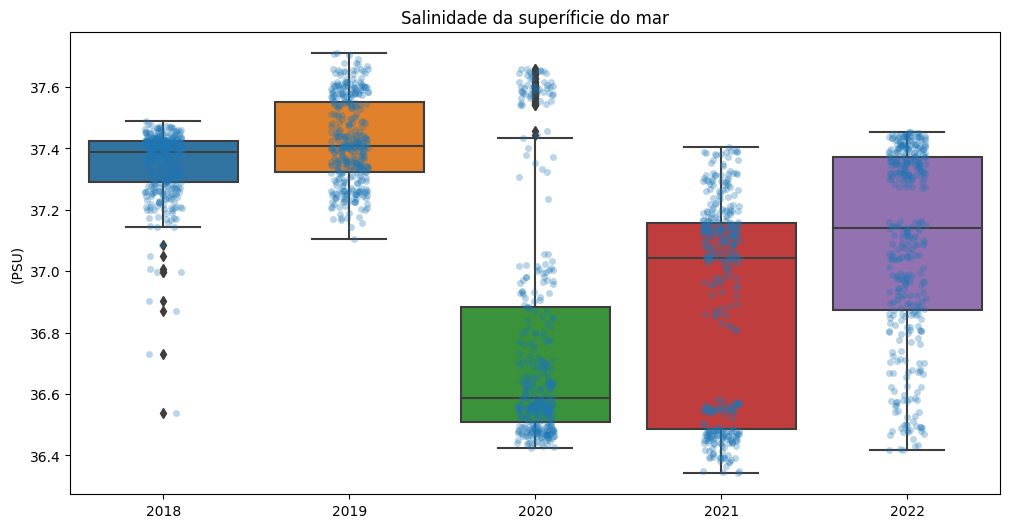

In [21]:
#PIR_SSS

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Salinidade da superíficie do mar")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='PIR_SSS',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="PIR_SSS",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(PSU)')


[Text(0.5, 0, ''), Text(0, 0.5, '(CM)')]

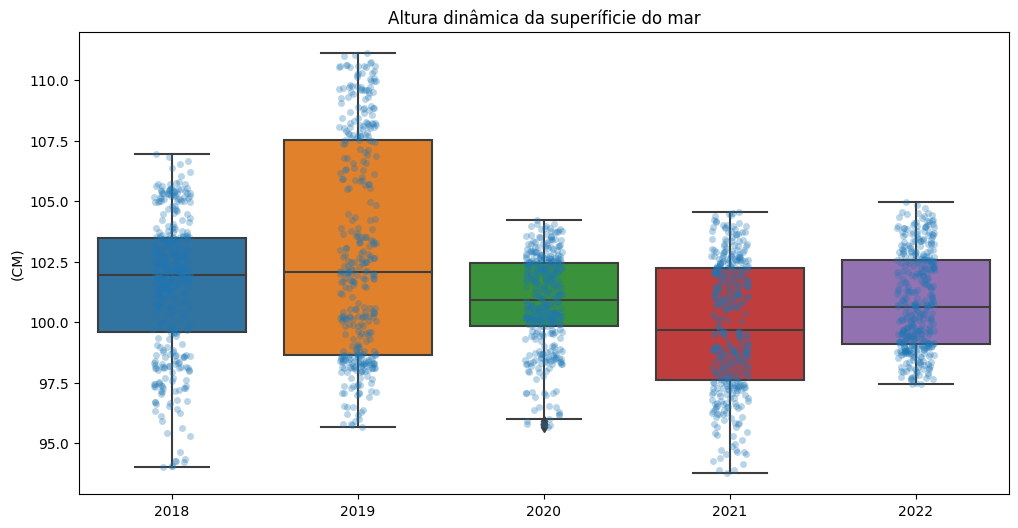

In [22]:
#PIR_DYN

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Altura dinâmica da superíficie do mar")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='PIR_DYN',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="PIR_DYN",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(CM)')

[Text(0.5, 0, ''), Text(0, 0.5, '(MM/HR)')]

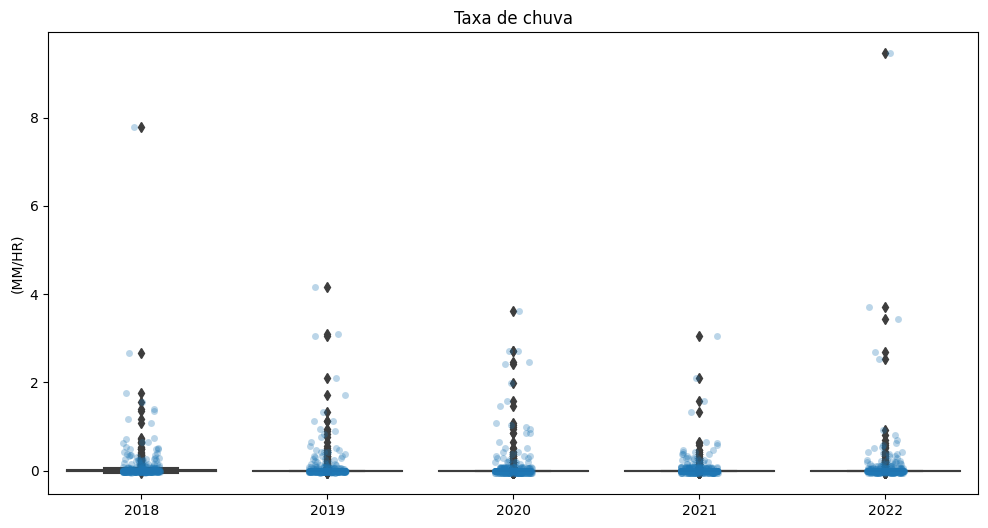

In [23]:
#PIR_SSS

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Taxa de chuva")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='PIR_PREC',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="PIR_PREC",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(MM/HR)')

[Text(0.5, 0, ''), Text(0, 0.5, 'C)')]

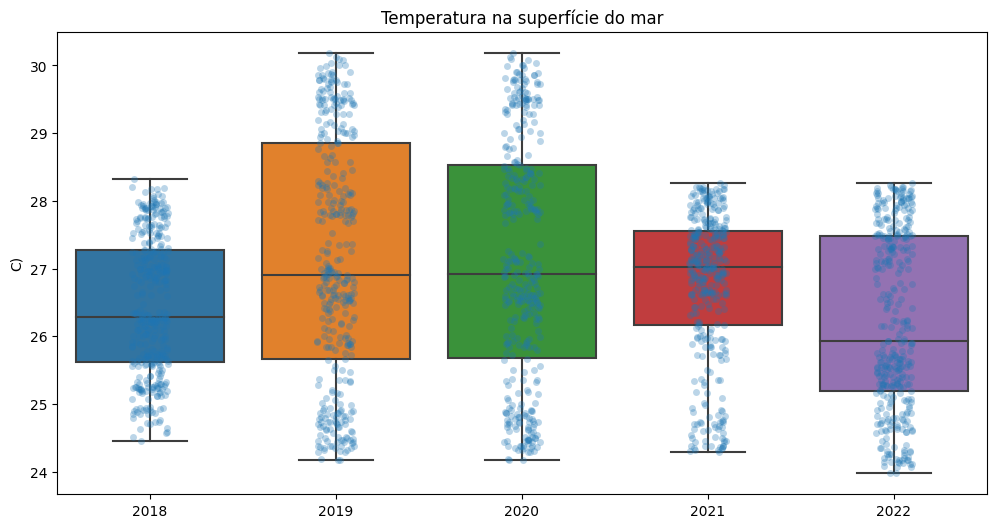

In [24]:
#PIR_SST

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Temperatura na superfície do mar")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='PIR_SST',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="PIR_SST",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='C)')

[Text(0.5, 0, ''), Text(0, 0.5, '(M/S)')]

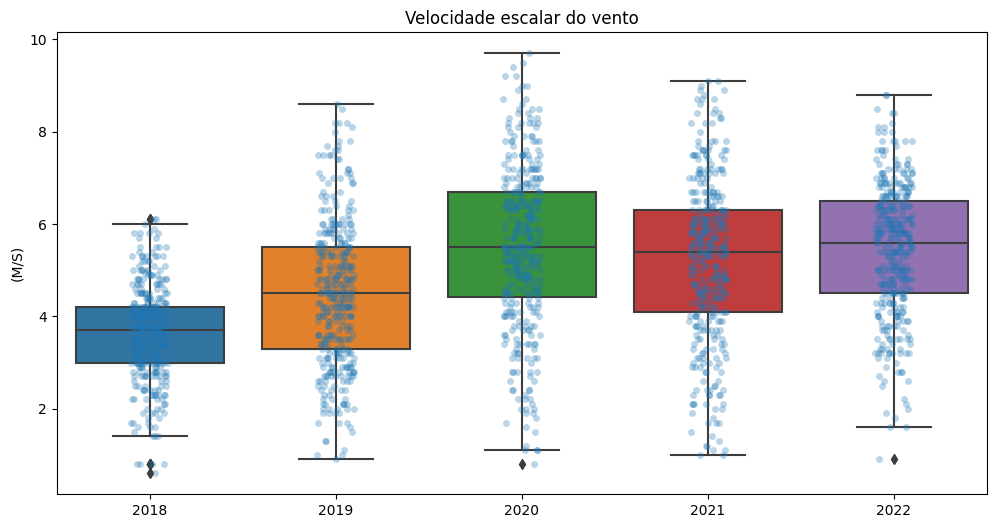

In [25]:
#PIR_WSPD

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Velocidade escalar do vento")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='PIR_WSPD',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="PIR_WSPD",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(M/S)')

[Text(0.5, 0, ''), Text(0, 0.5, '(M/S)')]

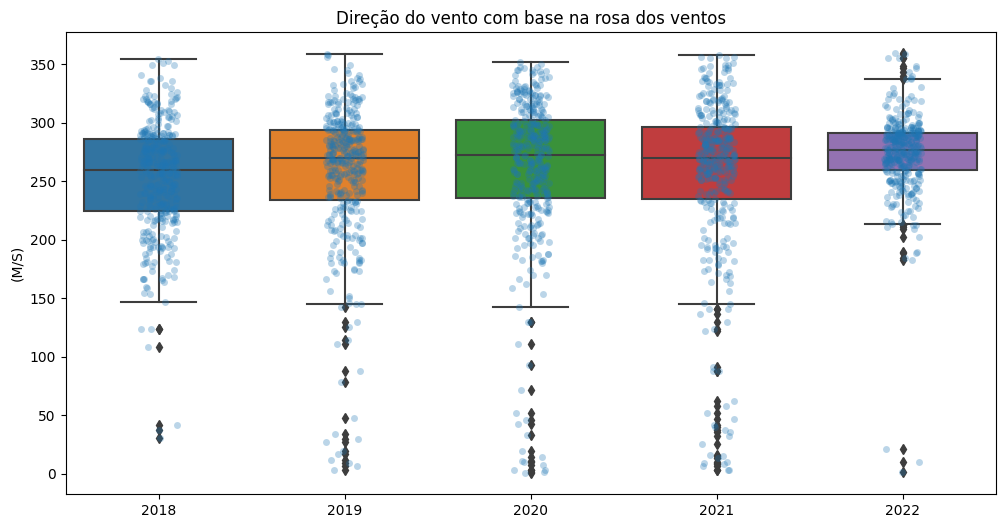

In [26]:
#PIR_WDIR

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Direção do vento com base na rosa dos ventos")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='PIR_WDIR',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="PIR_WDIR",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(M/S)')

#BoxPlot de série temporal: INMET

In [27]:
dfOceanoAtmosfera.columns

Index(['PIR_SSS', 'PIR_DYN', 'PIR_PREC', 'PIR_SST', 'PIR_WSPD', 'PIR_WDIR',
       'PIR_WDIRCR', 'INM_PREC_TOTAL', 'INM_TEMP_BSE', 'INM_UMID_AR',
       'INM_VENT_DIR', 'INM_VENT_VEL', 'INM_VENT_DROS'],
      dtype='object')

[Text(0.5, 0, ''), Text(0, 0.5, '(MM)')]

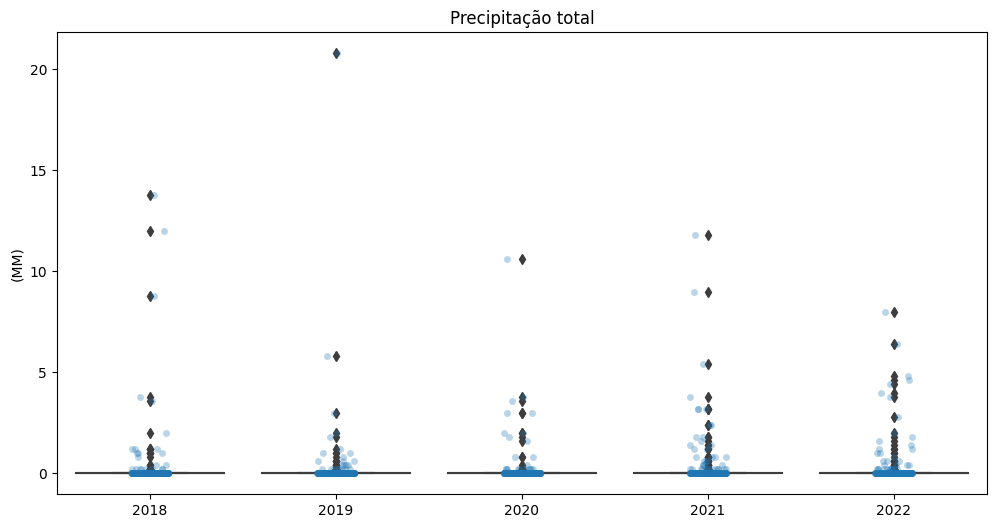

In [28]:
#INM_PREC_TOTAL

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Precipitação total")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='INM_PREC_TOTAL',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="INM_PREC_TOTAL",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(MM)')

[Text(0.5, 0, ''), Text(0, 0.5, '(C)')]

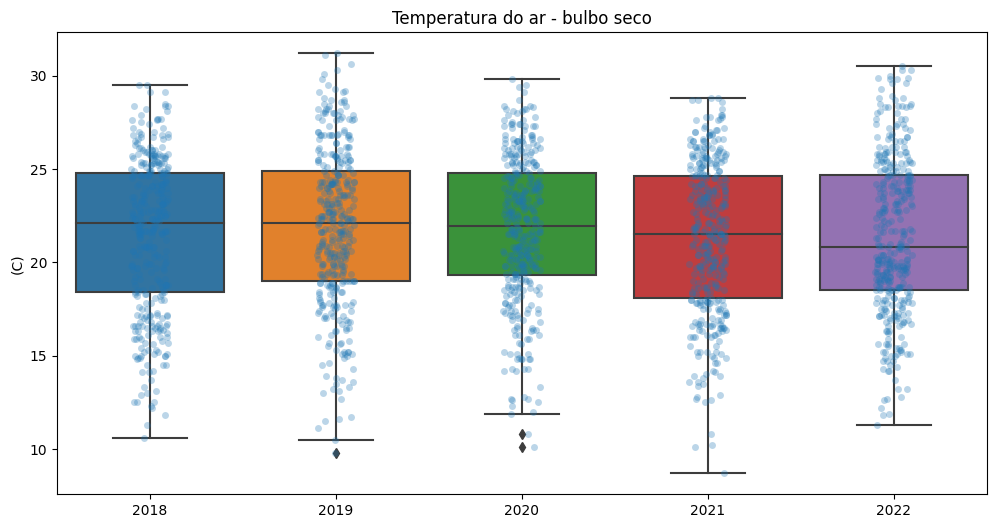

In [29]:
#INM_TEMP_BSE

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Temperatura do ar - bulbo seco")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='INM_TEMP_BSE',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="INM_TEMP_BSE",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(C)')

[Text(0.5, 0, ''), Text(0, 0.5, '(%)')]

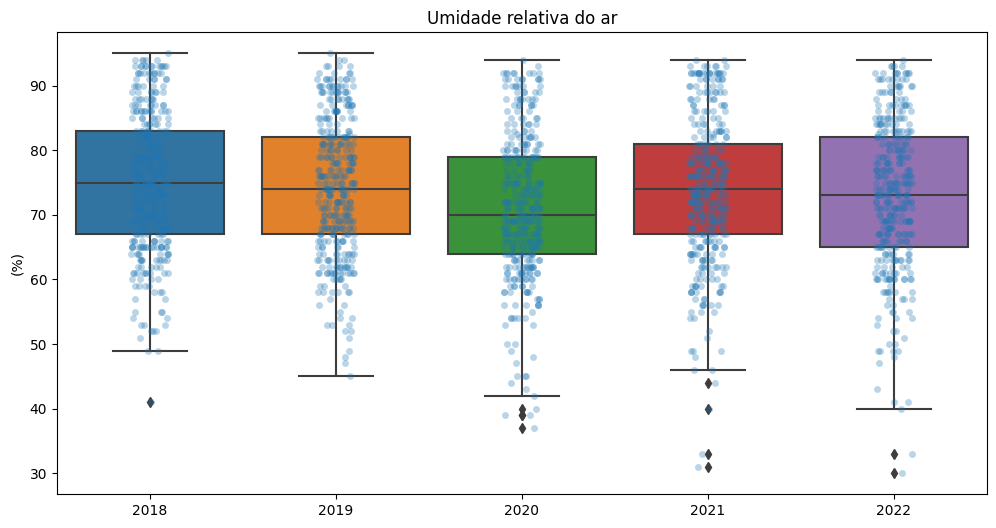

In [30]:
#INM_UMID_AR

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Umidade relativa do ar")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='INM_UMID_AR',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="INM_UMID_AR",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(%)')

[Text(0.5, 0, ''), Text(0, 0.5, '(DEG)')]

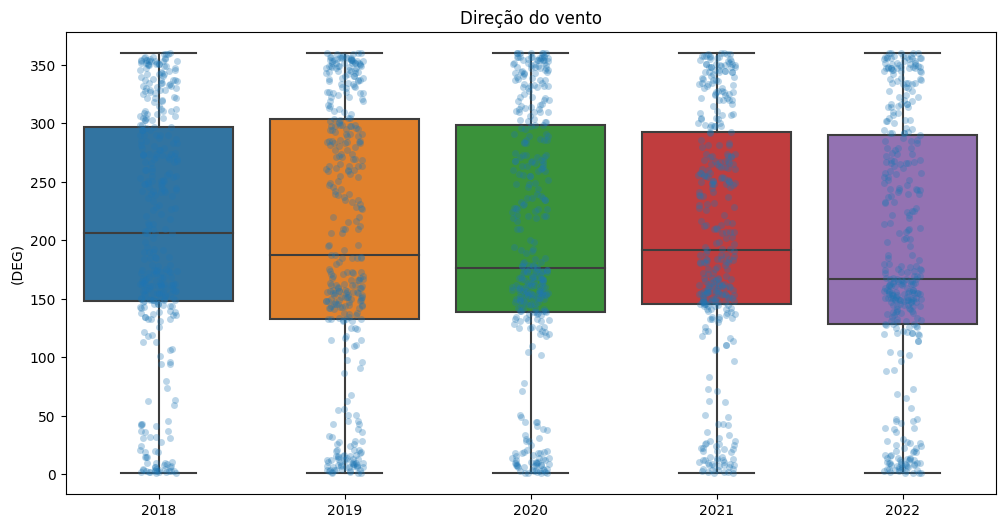

In [31]:
#INM_VENT_DIR

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Direção do vento")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='INM_VENT_DIR',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="INM_VENT_DIR",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(DEG)')

[Text(0.5, 0, ''), Text(0, 0.5, '(M/S)')]

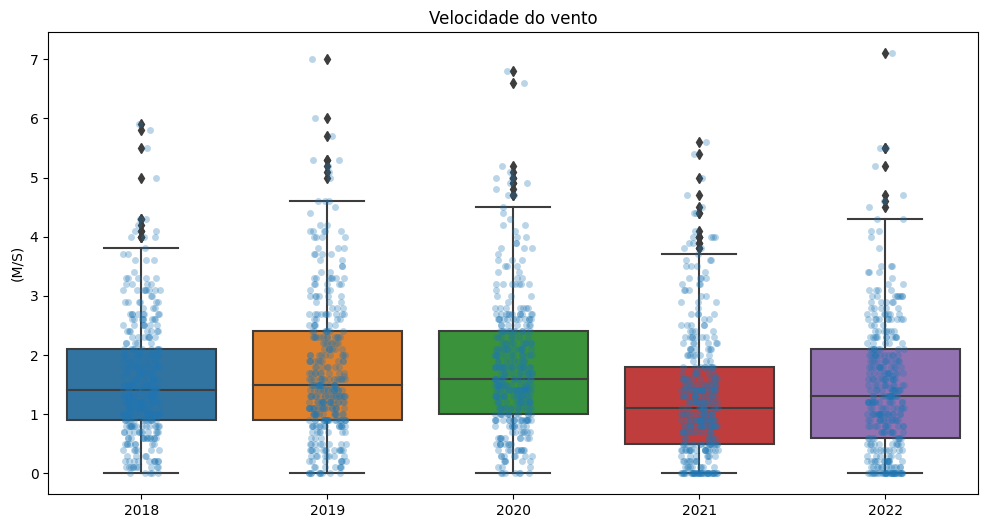

In [32]:
#INM_VENT_VEL

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Velocidade do vento")

sns.boxplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y='INM_VENT_VEL',
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    ax=ax).set(xlabel='', ylabel='')

sns.stripplot(
    x=pd.DatetimeIndex(pd.to_datetime(dfOceanoAtmosfera.index)).year,
    y="INM_VENT_VEL",
    data=dfOceanoAtmosfera.assign(year=pd.to_datetime(dfOceanoAtmosfera.index)),
    dodge=True,
    ax=ax,
    ec='k',
    alpha=0.3,
    jitter=True).set(xlabel='', ylabel='(M/S)')

#Teste de estacionaridade

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
dfOceanoAtmosfera.columns

Index(['PIR_SSS', 'PIR_DYN', 'PIR_PREC', 'PIR_SST', 'PIR_WSPD', 'PIR_WDIR',
       'PIR_WDIRCR', 'INM_PREC_TOTAL', 'INM_TEMP_BSE', 'INM_UMID_AR',
       'INM_VENT_DIR', 'INM_VENT_VEL', 'INM_VENT_DROS'],
      dtype='object')

In [35]:
print("\nTeste ADF PIR_SSS:\n{0}\n".format(adfuller(dfOceanoAtmosfera['PIR_PREC'].values)))
print("\nTeste ADF PIR_DYN:\n{0}\n".format(adfuller(dfOceanoAtmosfera['PIR_DYN'].values)))
print("\nTeste ADF PIR_PREC:\n{0}\n".format(adfuller(dfOceanoAtmosfera['PIR_PREC'].values)))
print("\nTeste ADF PIR_SST:\n{0}\n".format(adfuller(dfOceanoAtmosfera['PIR_SST'].values)))
print("\nTeste ADF PIR_WDIR:\n{0}\n".format(adfuller(dfOceanoAtmosfera['PIR_WDIR'].values)))
print("\nTeste ADF INM_PREC_TOTAL:\n{0}\n".format(adfuller(dfOceanoAtmosfera['INM_PREC_TOTAL'].values)))
print("\nTeste ADF INM_TEMP_BSE:\n{0}\n".format(adfuller(dfOceanoAtmosfera['INM_TEMP_BSE'].values)))
print("\nTeste ADF INM_UMID_AR:\n{0}\n".format(adfuller(dfOceanoAtmosfera['INM_UMID_AR'].values)))
print("\nTeste ADF INM_VENT_DIR:\n{0}\n".format(adfuller(dfOceanoAtmosfera['INM_VENT_DIR'].values)))
print("\nTeste ADF INM_VENT_VEL:\n{0}\n".format(adfuller(dfOceanoAtmosfera['INM_VENT_VEL'].values)))







Teste ADF PIR_SSS:
(-26.975842320406123, 0.0, 1, 1824, {'1%': -3.433940201056092, '5%': -2.8631258735235106, '10%': -2.5676142653629}, 2082.419530879744)


Teste ADF PIR_DYN:
(-4.2446932922004095, 0.0005530612659004534, 7, 1818, {'1%': -3.4339520666978056, '5%': -2.8631311116872475, '10%': -2.567617054512932}, 1641.9313457055223)


Teste ADF PIR_PREC:
(-26.975842320406123, 0.0, 1, 1824, {'1%': -3.433940201056092, '5%': -2.8631258735235106, '10%': -2.5676142653629}, 2082.419530879744)


Teste ADF PIR_SST:
(-3.3482699548116406, 0.012853941742214306, 24, 1801, {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}, -2725.731245700794)


Teste ADF PIR_WDIR:
(-17.222596114013943, 6.2659805832270634e-30, 3, 1822, {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}, 19365.32084584677)


Teste ADF INM_PREC_TOTAL:
(-40.541801364627794, 0.0, 0, 1825, {'1%': -3.4339382310452033, '5%': -2.863125003847544, '10%': -2.56761380228936}, 4915.67

#Graficos ACF e PACF

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

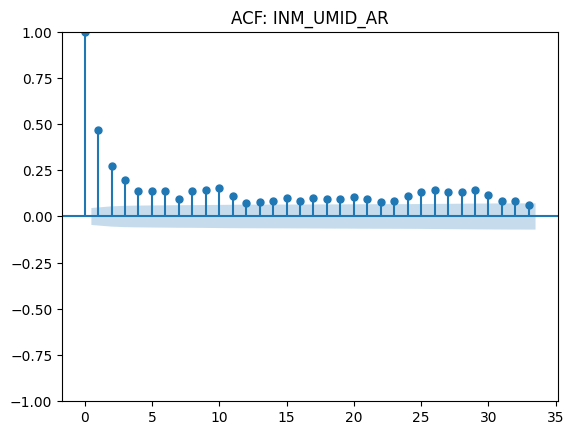

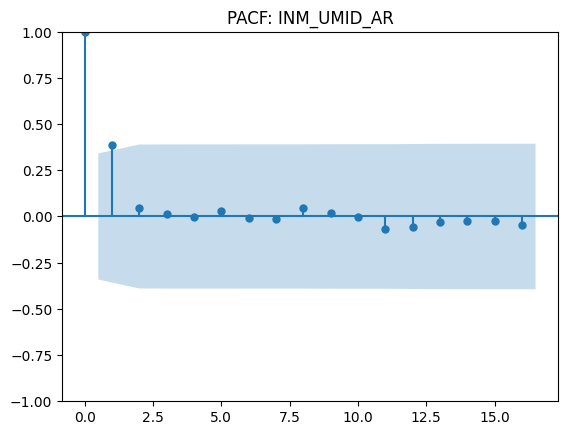

In [37]:
plot_acf(dfOceanoAtmosfera['INM_UMID_AR'], title='ACF: INM_UMID_AR')
plt.show()

print("\n")

plot_acf(pacf(dfOceanoAtmosfera['INM_UMID_AR']), title='PACF: INM_UMID_AR')
plt.show()
